<a href="https://colab.research.google.com/github/zulfauzi92/Hotel_Recomendation_Model_Traveloka/blob/main/Data_user_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633720 sha256=e4b4bc2a14a7844f81dc2bc04b953e6689158fec889dc5a12f726a360b537c18
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error 
import xgboost as xgb
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

In [4]:
#Load datafiniti hotel reviews dataset
dataset = pd.read_csv('/Datafiniti_Hotel_Reviews_Jun19.csv')
dataset

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,"2016-03-16T00:00:00Z,2016-04-03T00:00:00Z",4,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Wallingford,CT,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9996,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,2016-04-03T00:00:00Z,5,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",Homer,AK,bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9997,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",A

In [5]:
#change column name
dataset.rename(columns = {'reviews.username':'username', 'reviews.rating':'rating'}, inplace = True)
dataset

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,"2016-03-16T00:00:00Z,2016-04-03T00:00:00Z",4,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Wallingford,CT,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9996,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,2016-04-03T00:00:00Z,5,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",Homer,AK,bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9997,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & F

In [6]:
#hotel id as numbers
temp = []
hotel_id = []
i = 0
for hotel in dataset.id:
  if hotel not in temp:
    temp.append(hotel)
    hotel_id.append(i+1)
    i += 1
  else:
    hotel_id.append(i)

dataset['hotel_id'] = hotel_id
dataset.head(6)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,username,sourceURLs,websites,hotel_id
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,1
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2
5,AVweLARAByjofQCxv5vX,2016-05-16T22:39:30Z,2019-05-20T23:28:44Z,167 W Main St,"Hotels,Hotels and motels,Hotel,Restaurants",Accommodation & Food Services,Lexington,US,us/ky/lexington/167wmainst/-1165617038,38.047014,...,4,http://www.tripadvisor.com/Hotel_Review-g39588...,"This is such a fun, lovely hotel. The attentio...",Loved staying here,Nashville,TN,LKDiScenza,https://www.tripadvisor.com/Hotel_Review-g3958...,"http://www.firstnational.com/,https://www.21cm...",3


In [7]:
#username as numbers
temp = []
user_id = []
i = 0
for user in dataset.username:
  if user not in temp:
    temp.append(user)
    user_id.append(i+1)
    i += 1
  else:
    user_id.append(i)

dataset['user_id'] = user_id
dataset.head(6)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,username,sourceURLs,websites,hotel_id,user_id
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,1,1
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2,2
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2,3
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2,4
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,2,5
5,AVweLARAByjofQCxv5vX,2016-05-16T22:39:30Z,2019-05-20T23:28:44Z,167 W Main St,"Hotels,Hotels and motels,Hotel,Restaurants",Accommodation & Food Services,Lexington,US,us/ky/lexington/167wmainst/-1165617038,38.047014,...,http://www.tripadvisor.com/Hotel_Review-g39588...,"This is such a fun, lovely hotel. The attentio...",Loved staying here,Nashville,TN,LKDiScenza,https://www.tripadvisor.com/Hotel_Review-g3958...,"http://www.firstnational.com/,https://www.21cm...",3,6


In [8]:
# Take data columns hotel_id, review_username, and reviews_rating and sorting it by username
user_rating = pd.DataFrame(dataset, columns=['id','hotel_id','username','user_id', 'rating'])
user_rating


,id,hotel_id,username,user_id,rating
0,AWE2FvX5RxPSIh2RscTK,1,tatsurok2018,1,3
1,AVwcj_OhkufWRAb5wi9T,2,STEPHEN N,2,4
2,AVwcj_OhkufWRAb5wi9T,2,15Deborah,3,3
3,AVwcj_OhkufWRAb5wi9T,2,Wilfredo M,4,5
4,AVwcj_OhkufWRAb5wi9T,2,Luc D,5,2
...,...,...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,1431,Tiffany1017,9218,4
9996,AVwdatg0ByjofQCxo5S5,1431,bobg187,9219,5
9997,AVwdatg0ByjofQCxo5S5,1431,K261ANbrendah,9220,5
9998,AV1thTgM3-Khe5l_OvT5,1432,soccerrocks2016,9221,5


In [9]:
# Drop duplicate data id_hotel based on user_rating data
hotel_unique = user_rating.drop_duplicates(subset=['hotel_id'], keep='first')
hotel_unique

,id,hotel_id,username,user_id,rating
0,AWE2FvX5RxPSIh2RscTK,1,tatsurok2018,1,3
1,AVwcj_OhkufWRAb5wi9T,2,STEPHEN N,2,4
5,AVweLARAByjofQCxv5vX,3,LKDiScenza,6,4
7,AV1thAoL3-Khe5l_Ott5,4,madaramapquest,8,1
8,AVz6h4Sb3D1zeR_xDHsu,5,IUMIKECOO,9,5
...,...,...,...,...,...
9989,AVweVLmx_7pvs4fzCDKY,1429,fbodie2262,9212,5
9992,AWCPRUBCRxPSIh2RpqUY,1430,josephlL1691HG,9215,5
9993,AVwdatg0ByjofQCxo5S5,1431,Lynn W,9216,5
9998,AV1thTgM3-Khe5l_OvT5,1432,soccerrocks2016,9221,5


In [10]:
rating_data = pd.DataFrame(user_rating, columns=['hotel_id','user_id', 'rating'])
rating_data = rating_data.drop_duplicates(subset=['hotel_id', 'user_id'], keep='first')
rating_data.reset_index(drop=True, inplace=True)
rating_data

,hotel_id,user_id,rating
0,1,1,3
1,2,2,4
2,2,3,3
3,2,4,5
4,2,5,2
...,...,...,...
9299,1431,9218,4
9300,1431,9219,5
9301,1431,9220,5
9302,1432,9221,5


In [11]:
test1 = rating_data.drop_duplicates(subset=['hotel_id'], keep='first')
test1 = test1['hotel_id']
test1

0          1
1          2
5          3
7          4
8          5
        ... 
9293    1429
9296    1430
9297    1431
9302    1432
9303    1433
Name: hotel_id, Length: 1433, dtype: int64

In [12]:
test2 = rating_data.drop_duplicates(subset=['user_id'], keep='first')
test2 = test2['user_id']
test2

0          1
1          2
2          3
3          4
4          5
        ... 
9299    9218
9300    9219
9301    9220
9302    9221
9303    9222
Name: user_id, Length: 9222, dtype: int64

In [13]:
def generateVector(users, hotels, data):
  lengthUser = len(users)
  lengthHotel = len(hotels)

  user_vector = []
  hotel_vector = []
  rating_vector = []
  
  for i in range(lengthUser):

    user = np.zeros(lengthUser)
    hotel = np.zeros(lengthHotel)
    rating = np.zeros(lengthHotel)

    user[i] = 1

    filter_hotel = data[data['user_id'] == (i+1)]
    
    for item in filter_hotel.values:
      hotel[item[0]-1] = 1
      rating[item[0]-1] = item[2]
    
    hotel_vector.append(hotel)
    user_vector.append(user)
    rating_vector.append(rating)
  
  return np.array(user_vector), np.array(hotel_vector), np.array(rating_vector)

In [14]:
user_vector, hotel_vector, rating_vector = generateVector(test2, test1, rating_data)

In [15]:
rating_vector

array([[3., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 0., 5., 0.],
       [0., 0., 0., ..., 0., 0., 4.]])

In [16]:
column_name = []
for hotel in test1:
  column_name.append("hotel{}".format(hotel))

rating_table = pd.DataFrame(rating_vector, columns = column_name)
rating_table.insert(0, 'user_id', test2)

rating_table.head(6)

,user_id,hotel1,hotel2,hotel3,hotel4,hotel5,hotel6,hotel7,hotel8,hotel9,...,hotel1424,hotel1425,hotel1426,hotel1427,hotel1428,hotel1429,hotel1430,hotel1431,hotel1432,hotel1433
0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#split to train and test data
split_value = int(len(user_rating) * 0.80)
train_data = user_rating[:split_value]
test_data = user_rating[split_value:]

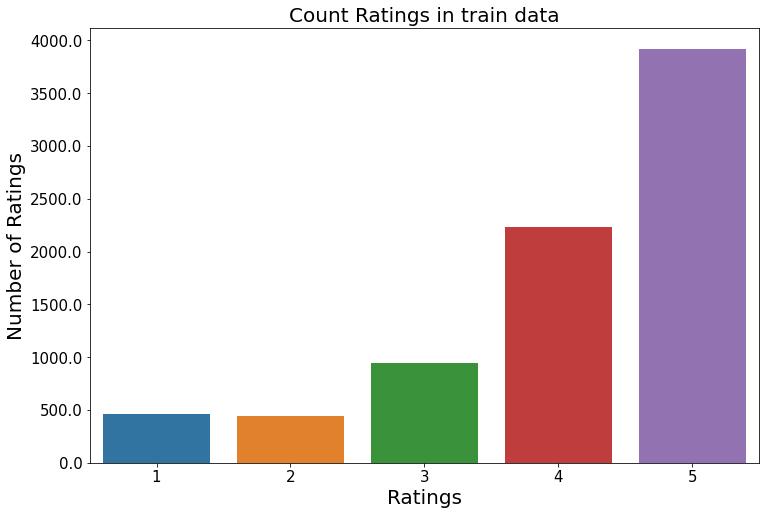

In [20]:
#count number of rating in train set data
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=train_data)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [21]:
#number of rated hotel per user
no_rated_hotel_per_user = train_data.groupby(by = "user_id")["rating"].count().sort_values(ascending = False)
no_rated_hotel_per_user.head()

user_id
7411    6
6577    6
3456    6
7410    5
6123    5
Name: rating, dtype: int64

In [22]:
#rating number per hotel
no_ratings_per_hotel = train_data.groupby(by = "hotel_id")["rating"].count().sort_values(ascending = False)
no_ratings_per_hotel.head()

hotel_id
1239    209
486     183
49      135
70      132
24      132
Name: rating, dtype: int64

In [23]:
def get_user_item_sparse_matrix(df):
    sparse_data = sparse.csr_matrix((df.rating, (df.user_id, df.hotel_id)))
    return sparse_data

In [24]:
train_sparse_data = get_user_item_sparse_matrix(train_data)

In [25]:
test_sparse_data = get_user_item_sparse_matrix(test_data)

In [26]:
global_average_rating = train_sparse_data.sum()/train_sparse_data.count_nonzero()
print("Global Average Rating: {}".format(global_average_rating))

Global Average Rating: 4.354272025552302


In [27]:
def get_average_rating(sparse_matrix, is_user):
    ax = 1 if is_user else 0
    sum_of_ratings = sparse_matrix.sum(axis = ax).A1  
    no_of_ratings = (sparse_matrix != 0).sum(axis = ax).A1 
    rows, cols = sparse_matrix.shape
    average_ratings = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(rows if is_user else cols) if no_of_ratings[i] != 0}
    return average_ratings

In [28]:
average_rating_user = get_average_rating(train_sparse_data, True)

In [29]:
avg_rating_hotel = get_average_rating(train_sparse_data, False)

In [30]:
total_users = len(np.unique(user_rating["user_id"]))
train_users = len(average_rating_user)
uncommonUsers = total_users - train_users
                  
print("Total no. of Users = {}".format(total_users))
print("No. of Users in train data= {}".format(train_users))
print("No. of Users not present in train data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))

Total no. of Users = 9222
No. of Users in train data= 7448
No. of Users not present in train data = 1774(19.0%)


In [31]:
total_hotel = len(np.unique(user_rating["hotel_id"]))
train_hotel = len(avg_rating_hotel)
uncommonHotels = total_hotel - train_hotel
                  
print("Total no. of hotels = {}".format(total_hotel))
print("No. of hotels in train data= {}".format(train_hotel))
print("No. of hotes not present in train data = {}({}%)".format(uncommonHotels, np.round((uncommonHotels/total_hotel)*100), 2))

Total no. of hotels = 1433
No. of hotels in train data= 1240
No. of hotes not present in train data = 193(13.0%)


In [32]:
hotel_data = pd.DataFrame(dataset, columns=['hotel_id','rating','id'])
hotel_data

,hotel_id,rating,id
0,1,3,AWE2FvX5RxPSIh2RscTK
1,2,4,AVwcj_OhkufWRAb5wi9T
2,2,3,AVwcj_OhkufWRAb5wi9T
3,2,5,AVwcj_OhkufWRAb5wi9T
4,2,2,AVwcj_OhkufWRAb5wi9T
...,...,...,...
9995,1431,4,AVwdatg0ByjofQCxo5S5
9996,1431,5,AVwdatg0ByjofQCxo5S5
9997,1431,5,AVwdatg0ByjofQCxo5S5
9998,1432,5,AV1thTgM3-Khe5l_OvT5


In [33]:
def compute_user_similarity(sparse_matrix, limit=100):
    row_index, col_index = sparse_matrix.nonzero()
    rows = np.unique(row_index)
    similar_arr = np.zeros(61700).reshape(617,100)
    
    for row in rows[:limit]:
        sim = cosine_similarity(sparse_matrix.getrow(row), train_sparse_data).ravel()
        similar_indices = sim.argsort()[-limit:]
        similar = sim[similar_indices]
        similar_arr[row] = similar
    
    return similar_arr

In [34]:
similar_user_matrix  = compute_user_similarity(train_sparse_data, 100)

In [35]:
similar_user_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
def compute_hotel_similarity_count(sparse_matrix, hotel_data, hotel_id):
    similarity = cosine_similarity(sparse_matrix.T, dense_output = False)
    no_of_similar_hotels = hotel_data.loc[hotel_id][1], similarity[hotel_id].count_nonzero()
    return no_of_similar_hotels

In [38]:
similar_hotels = compute_hotel_similarity_count(train_sparse_data, hotel_data, 100)
print("Similar Hotels = {}".format(similar_hotels))

Similar Hotels = (5, 1)


In [39]:
def get_sample_sparse_matrix(sparse_matrix, no_of_users, no_of_hotels):
    users, hotels, ratings = sparse.find(sparse_matrix)
    uniq_users = np.unique(users)
    uniq_hotels = np.unique(hotels)
    np.random.seed(15) 
    user = np.random.choice(uniq_users, no_of_users, replace = False)
    hotel = np.random.choice(uniq_hotels, no_of_hotels, replace = True)
    mask = np.logical_and(np.isin(users, user), np.isin(hotels, hotel))
    sparse_matrix = sparse.csr_matrix((ratings[mask], (users[mask], hotels[mask])), 
                                                     shape = (max(user)+1, max(hotel)+1))
    return sparse_matrix

In [40]:
train_sample_sparse_matrix = get_sample_sparse_matrix(train_sparse_data, 400, 40)

In [41]:
test_sparse_matrix_matrix = get_sample_sparse_matrix(test_sparse_data, 200, 20)

In [42]:
def create_new_similar_features(sample_sparse_matrix):
    global_avg_rating = get_average_rating(sample_sparse_matrix, False)
    global_avg_users = get_average_rating(sample_sparse_matrix, True)
    global_avg_hotels = get_average_rating(sample_sparse_matrix, False)
    sample_train_users, sample_train_hotels, sample_train_ratings = sparse.find(sample_sparse_matrix)
    new_features_csv_file = open("/new_features.csv", mode = "w")
    
    for user, hotel, rating in zip(sample_train_users, sample_train_hotels, sample_train_ratings):
        similar_arr = list()
        similar_arr.append(user)
        similar_arr.append(hotel)
        similar_arr.append(sample_sparse_matrix.sum()/sample_sparse_matrix.count_nonzero())
        
        similar_users = cosine_similarity(sample_sparse_matrix[user], sample_sparse_matrix).ravel()
        indices = np.argsort(-similar_users)[1:]
        ratings = sample_sparse_matrix[indices, hotel].toarray().ravel()
        top_similar_user_ratings = list(ratings[ratings != 0][:5])
        top_similar_user_ratings.extend([global_avg_rating[hotel]] * (5 - len(ratings)))
        similar_arr.extend(top_similar_user_ratings)
        
        similar_hotels = cosine_similarity(sample_sparse_matrix[:,hotel].T, sample_sparse_matrix.T).ravel()
        similar_hotels_indices = np.argsort(-similar_hotels)[1:]
        similar_hotels_ratings = sample_sparse_matrix[user, similar_hotels_indices].toarray().ravel()
        top_similar_hotel_ratings = list(similar_hotels_ratings[similar_hotels_ratings != 0][:5])
        top_similar_hotel_ratings.extend([global_avg_users[user]] * (5-len(top_similar_hotel_ratings)))
        similar_arr.extend(top_similar_hotel_ratings)
        
        similar_arr.append(global_avg_users[user])
        similar_arr.append(global_avg_hotels[hotel])
        similar_arr.append(rating)
        
        new_features_csv_file.write(",".join(map(str, similar_arr)))
        new_features_csv_file.write("\n")
        
    new_features_csv_file.close()
    new_features_df = pd.read_csv('/new_features.csv', names = ["user_id", "hotel_id", "gloabl_average", "similar_user_rating1", 
                                                               "similar_user_rating2", "similar_user_rating3", 
                                                               "similar_user_rating4", "similar_user_rating5", 
                                                               "similar_hotel_rating1", "similar_hotel_rating2", 
                                                               "similar_hotel_rating3", "similar_hotel_rating4", 
                                                               "similar_hotel_rating5", "user_average", 
                                                               "hotel_average", "rating"])
    return new_features_df
            

In [43]:
train_new_similar_features = create_new_similar_features(train_sample_sparse_matrix)
train_new_similar_features.head()

,user_id,hotel_id,gloabl_average,similar_user_rating1,similar_user_rating2,similar_user_rating3,similar_user_rating4,similar_user_rating5,similar_hotel_rating1,similar_hotel_rating2,similar_hotel_rating3,similar_hotel_rating4,similar_hotel_rating5,user_average,hotel_average,rating
0,69,14,4.857143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
1,1769,244,4.857143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
2,1893,262,4.857143,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.333333,4.0,NaN,NaN,NaN
3,1911,262,4.857143,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.333333,5.0,NaN,NaN,NaN
4,1964,262,4.857143,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.333333,4.0,NaN,NaN,NaN


In [44]:
test_new_similar_features = create_new_similar_features(test_sparse_matrix_matrix)

In [45]:
train_new_similar_features = train_new_similar_features.fillna(0)
train_new_similar_features.head()

,user_id,hotel_id,gloabl_average,similar_user_rating1,similar_user_rating2,similar_user_rating3,similar_user_rating4,similar_user_rating5,similar_hotel_rating1,similar_hotel_rating2,similar_hotel_rating3,similar_hotel_rating4,similar_hotel_rating5,user_average,hotel_average,rating
0,69,14,4.857143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.000000,0.0,0.0,0.0,0.0
1,1769,244,4.857143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.000000,0.0,0.0,0.0,0.0
2,1893,262,4.857143,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.333333,4.0,0.0,0.0,0.0
3,1911,262,4.857143,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.333333,5.0,0.0,0.0,0.0
4,1964,262,4.857143,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.333333,4.0,0.0,0.0,0.0


In [46]:
test_new_similar_features = create_new_similar_features(test_sparse_matrix_matrix)

In [47]:
test_new_similar_features = test_new_similar_features.fillna(0)
test_new_similar_features.head()

,user_id,hotel_id,gloabl_average,similar_user_rating1,similar_user_rating2,similar_user_rating3,similar_user_rating4,similar_user_rating5,similar_hotel_rating1,similar_hotel_rating2,similar_hotel_rating3,similar_hotel_rating4,similar_hotel_rating5,user_average,hotel_average,rating
0,7825,1278,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,8153,1351,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
2,8733,1401,5.0,5.0,8.0,8.0,8.0,8.0,8.0,8.0,6.5,8.0,0.0,0.0,0.0,0.0
3,8739,1401,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.5,5.0,0.0,0.0,0.0,0.0
4,9222,1433,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
